<a href="https://colab.research.google.com/github/Shohjahon02/first_my_git/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.7.12

In [2]:
import torch
import fastai

In [20]:
print(torch.__version__)
print(fastai.__version__)

2.0.0+cu118
2.7.12


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
!cd OIDv4_ToolKit/ && pip install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200

In [8]:
from fastai.vision.all import*
from ipywidgets import widgets

path = Path('train')
# fls = get_image_files(path)
# failed = verify_images(path)

transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = transports.dataloaders(path)

# dls.train.show_batch(max_n=32, nrows=4)



In [9]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

In [10]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.333700,0.311189,0.900000,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.368050,0.280399,0.908333,00:13
1,0.262426,0.277859,0.908333,00:12
2,0.196046,0.289996,0.908333,00:12
3,0.157718,0.297185,0.908333,00:12


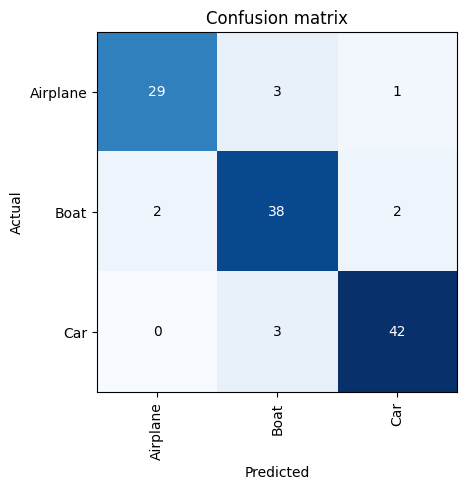

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

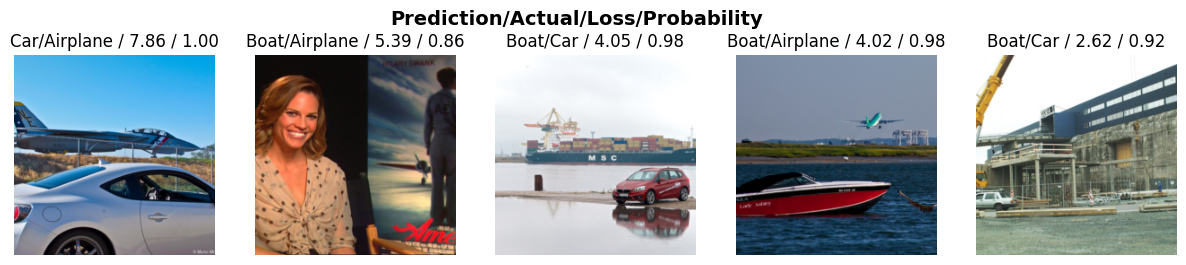

In [12]:
interp.plot_top_losses(5, nrows=1)

In [13]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Boat
Ehtimollik:100.0%


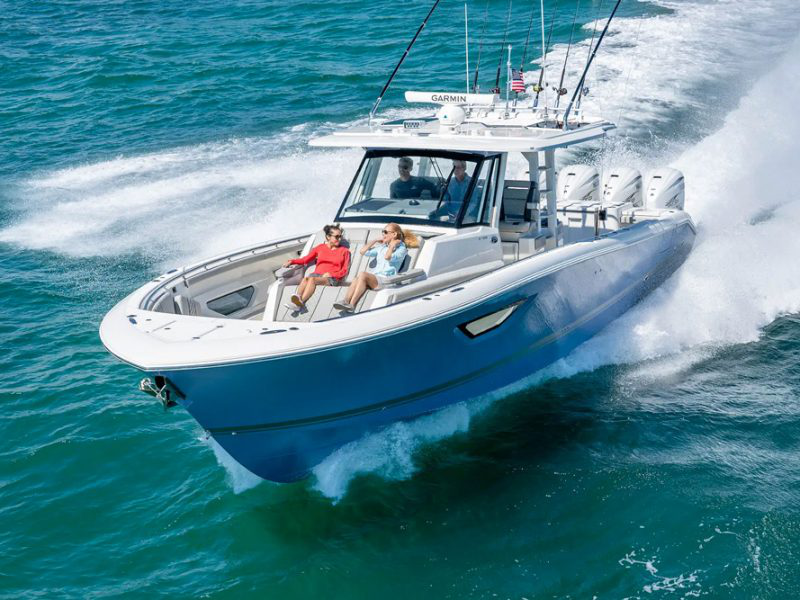

In [19]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat:{pred}")
print(f"Ehtimollik:{probs[pred_id]*100:.1f}%")
img